<a href="https://colab.research.google.com/github/Sari275/my-machine-learning-projects/blob/main/Sari_Elian's_Project_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")
df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


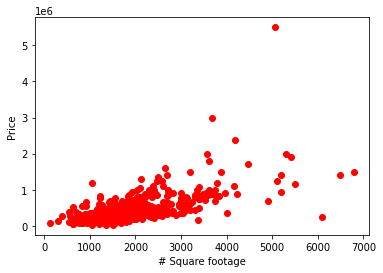

In [ ]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [ ]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1))
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)
y = y.reshape(len(X),1)

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Do Gradient Decent

In [ ]:
# Initialize the parameter vector w with random numbers
#np.random.seed(20)

w = np.random.rand(2,1)
#w0 = w[0]
#w1 = w[1]

# Initialize the learning rate to 0.01.
Learning_Rate = 0.01

# Loop for 2000 epochs MAX.
# This number of Epochs is small enough to allow you to debug the code quickly. You’re welcome to increase the number of epochs to get better results.
MAX_EPOCHS = 2000
## Your code goes here ...
Mean_Squared_Error_Array=[]
for iteration in range (0, MAX_EPOCHS):
    W = (np.matlib.repmat(w.transpose(),len(X),1))  # Repeat w=[w_0 w_1]^T Length of X # of rows by 1 Column number of times (Adds another column) --> 781x2
    # Update Equation
    first_half = np.sum(np.multiply(W, X), axis=1, keepdims=True)    # element-wise multiplication to produce a 576x2 matrix
    numerator = first_half - y
    w = w - Learning_Rate*np.transpose(\
            np.mean(np.multiply(numerator,X), axis=0, keepdims=True)) # average across columns
#Compute The Mean Squared Error
    y_hat = np.dot(X,w)
    Mean_Squared_Error = (np.sum((y_hat-y)**2) / (2*len(y)))

# Storing results of the Mean Squared Error to be plotted
    Mean_Squared_Error_Array.append(Mean_Squared_Error)

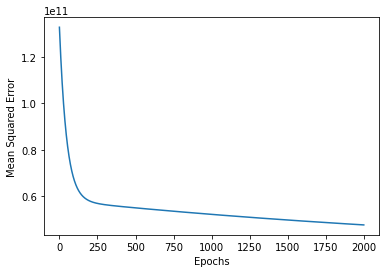

47779321682.677475


In [ ]:
#Plotting The Mean Squared Error Vs The Number of Iterations
plt.plot(Mean_Squared_Error_Array)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()
print(Mean_Squared_Error)

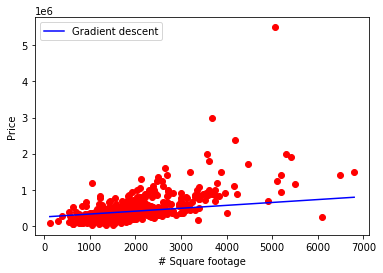

In [ ]:
# Plotting the Fitted Curve
y_hat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, y_hat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [ ]:
#Printing the weight vector w
print (w)

[[257033.05801507]
 [535468.05382731]]


In [ ]:
# Predicting the price of a 5000 square foot house
# Remember to normalize it first
squarefootage = 5000
normalized_squarefootage = (squarefootage - Xmin)/max_min
print(w[0] + normalized_squarefootage*w[1])

[648213.31290688]
